In [27]:
# let's try using linear regression to predict the label using the irregularity score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Create a gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Create a support vector classifier
from sklearn.svm import SVC

# Create a Bayesian optimization
from bayes_opt import BayesianOptimization

# visualize using pairplot
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# load the results
pan_tompkins_results = pd.read_csv('results/mit_bih_pan_tomkins_features.csv')
pan_tompkins_results = pan_tompkins_results.dropna().drop('record_name', axis=1)
print('results shape:', pan_tompkins_results.shape)

results shape: (500, 14)


In [30]:
from sklearn.preprocessing import StandardScaler

# remove nan values
pan_tompkins_results = pan_tompkins_results.dropna()

# remove pnn50 as it is  not correct
pan_tompkins_results = pan_tompkins_results.drop(columns=['pnn50'])

# scale all the features
# scaler = StandardScaler()
# pan_tompkins_results[['rr_std', 'hr_std', 'signal_power', 'signal_entropy']] = scaler.fit_transform(pan_tompkins_results[['rr_std', 'hr_std', 'signal_power', 'signal_entropy']])

# lets print the columns
print(pan_tompkins_results.columns)
display(pan_tompkins_results.head())

# split the data into train and test
X, y = pan_tompkins_results.drop('label', axis=1), pan_tompkins_results['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_names = X.columns


Index(['rr_mean', 'rr_std', 'rmssd', 'hr_mean', 'hr_std', 'min_hr', 'max_hr',
       'signal_power', 'signal_entropy', 'irregularity_mean',
       'irregularity_std', 'rr_coefficient', 'label'],
      dtype='object')


,rr_mean,rr_std,rmssd,hr_mean,hr_std,min_hr,max_hr,signal_power,signal_entropy,irregularity_mean,irregularity_std,rr_coefficient,label
0,0.822500,0.023715,0.822842,60.840255,1.208851,59.358218,62.939115,0.026343,93.718529,0.822500,0.023715,0.028833,N
1,0.807828,0.026612,0.808267,61.960830,1.382845,59.961712,64.366881,0.029220,95.685380,0.807828,0.026612,0.032943,N
2,0.817172,0.027647,0.817639,61.255365,1.273002,58.929743,62.951063,0.027858,96.570941,0.817172,0.027647,0.033832,N
3,0.818333,0.019452,0.818564,61.134978,1.160438,59.868870,63.167664,0.029531,97.043588,0.818333,0.019452,0.023771,N
4,0.807071,0.023788,0.807421,62.005106,1.239186,59.486375,63.604770,0.025884,99.866994,0.807071,0.023788,0.029475,N


KeyError: 'S'

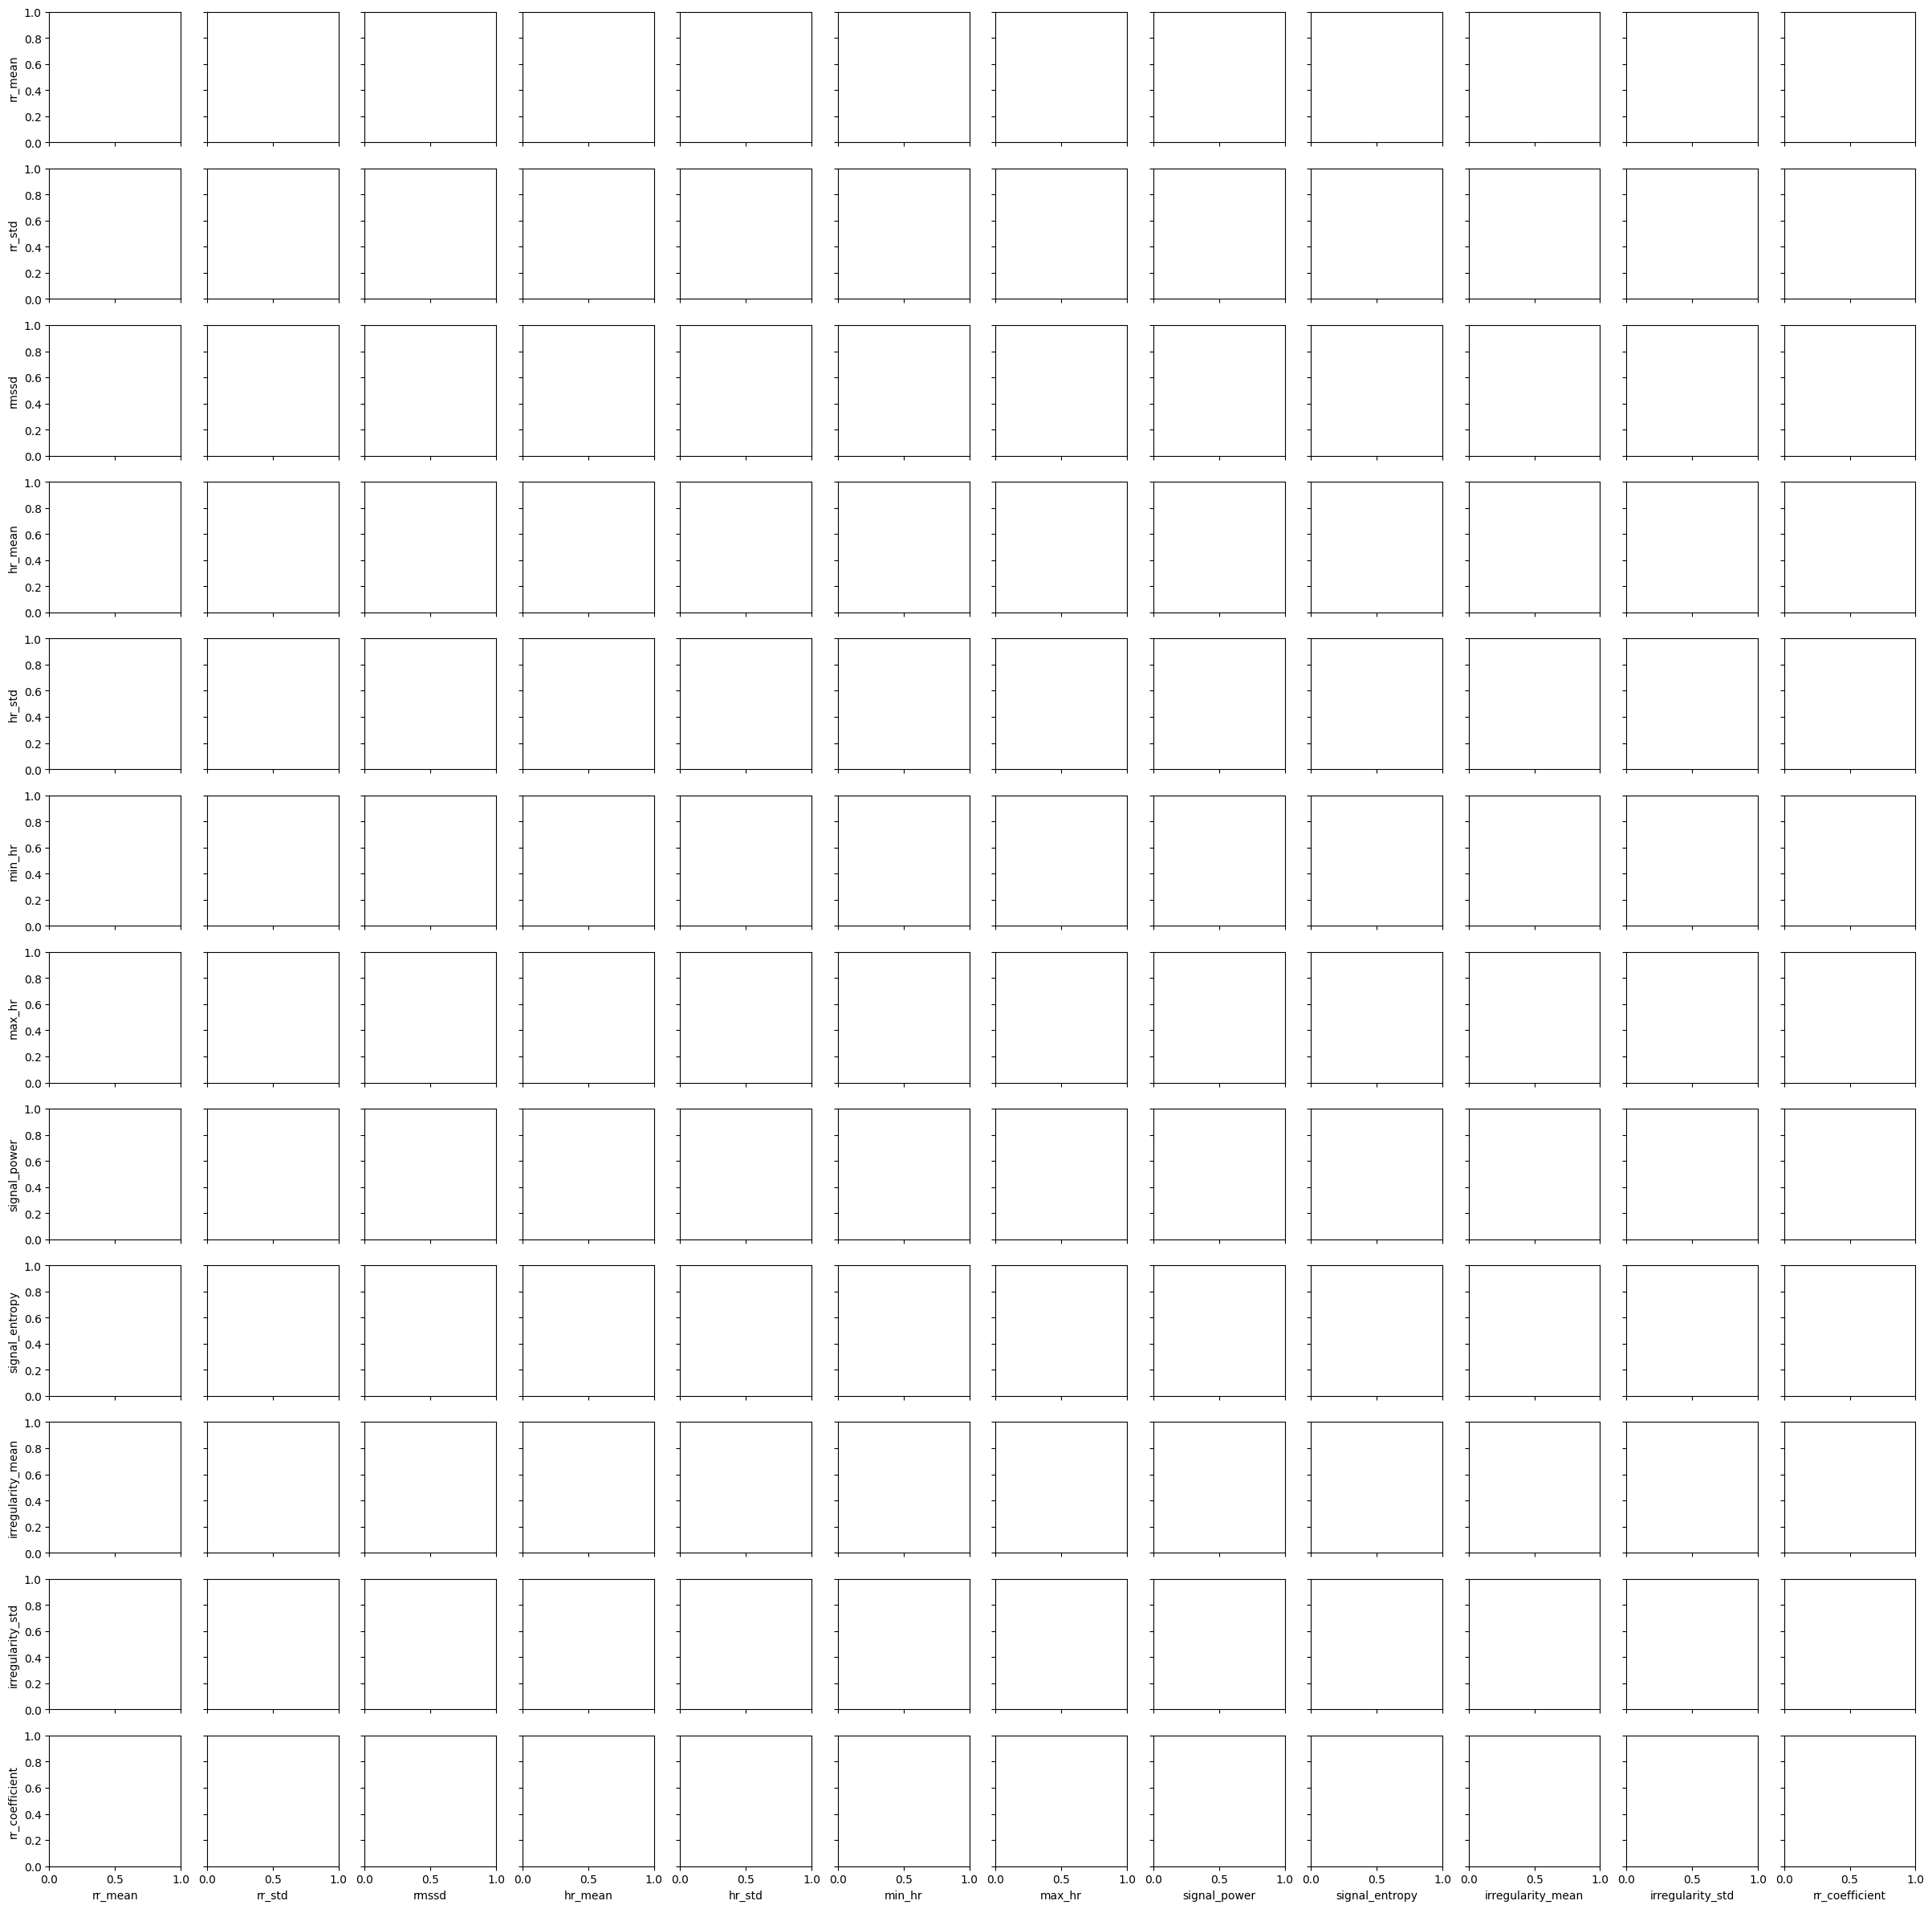

In [31]:

sns.pairplot(pan_tompkins_results[:500], hue='label', diag_kind='kde', 
             palette={'N': 'green', 'A': 'red', 'O': 'orange', '~': 'gray'},              
             plot_kws={'alpha': 0.6})
plt.show()

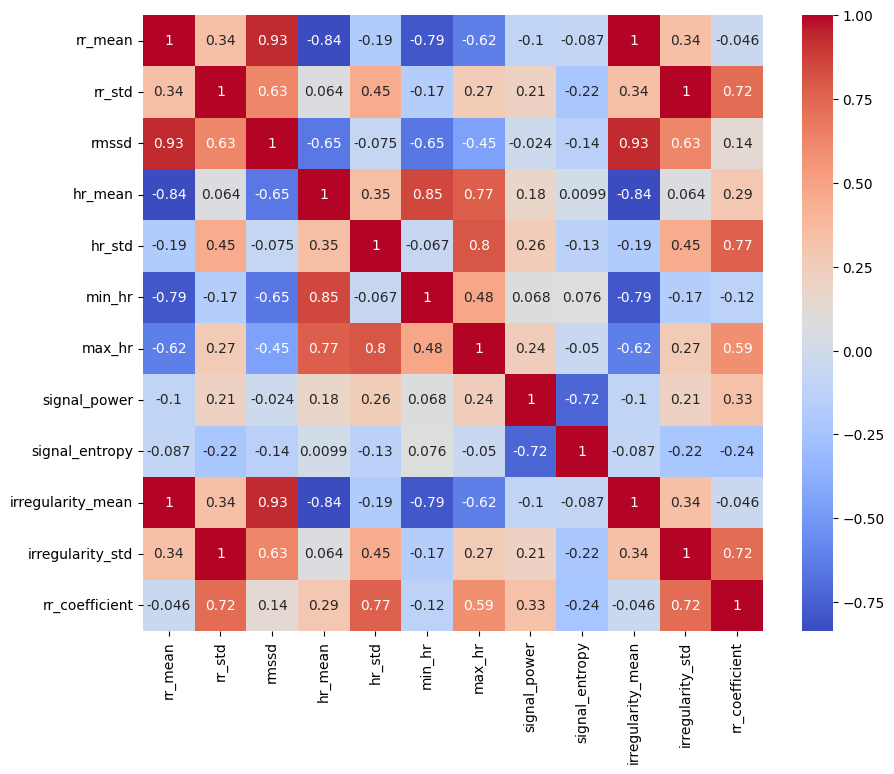

In [5]:
# plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pan_tompkins_results.drop(columns=['label']).corr(), annot=True, cmap='coolwarm')
plt.show()

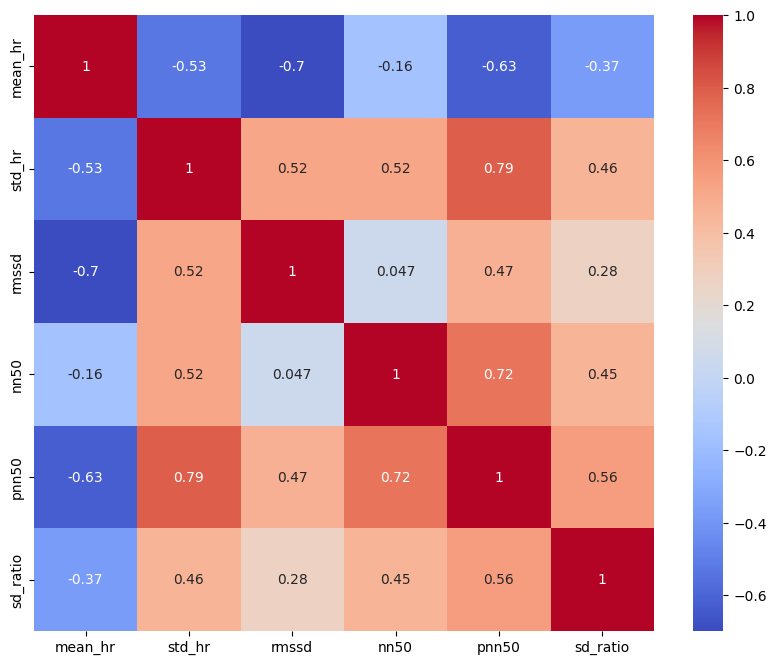

In [6]:
# remove highly correlated features
hrv_results = hrv_results.drop(columns=['sd1', 'sd2', 'total_power', 'tinn', 'sdnn'])
hrv_results = hrv_results.drop(columns=['lf_power', 'hf_power', 'lf_hf_ratio'])
plt.figure(figsize=(10, 8))
sns.heatmap(hrv_results.drop(columns=['label']).corr(), annot=True, cmap='coolwarm')
plt.show()

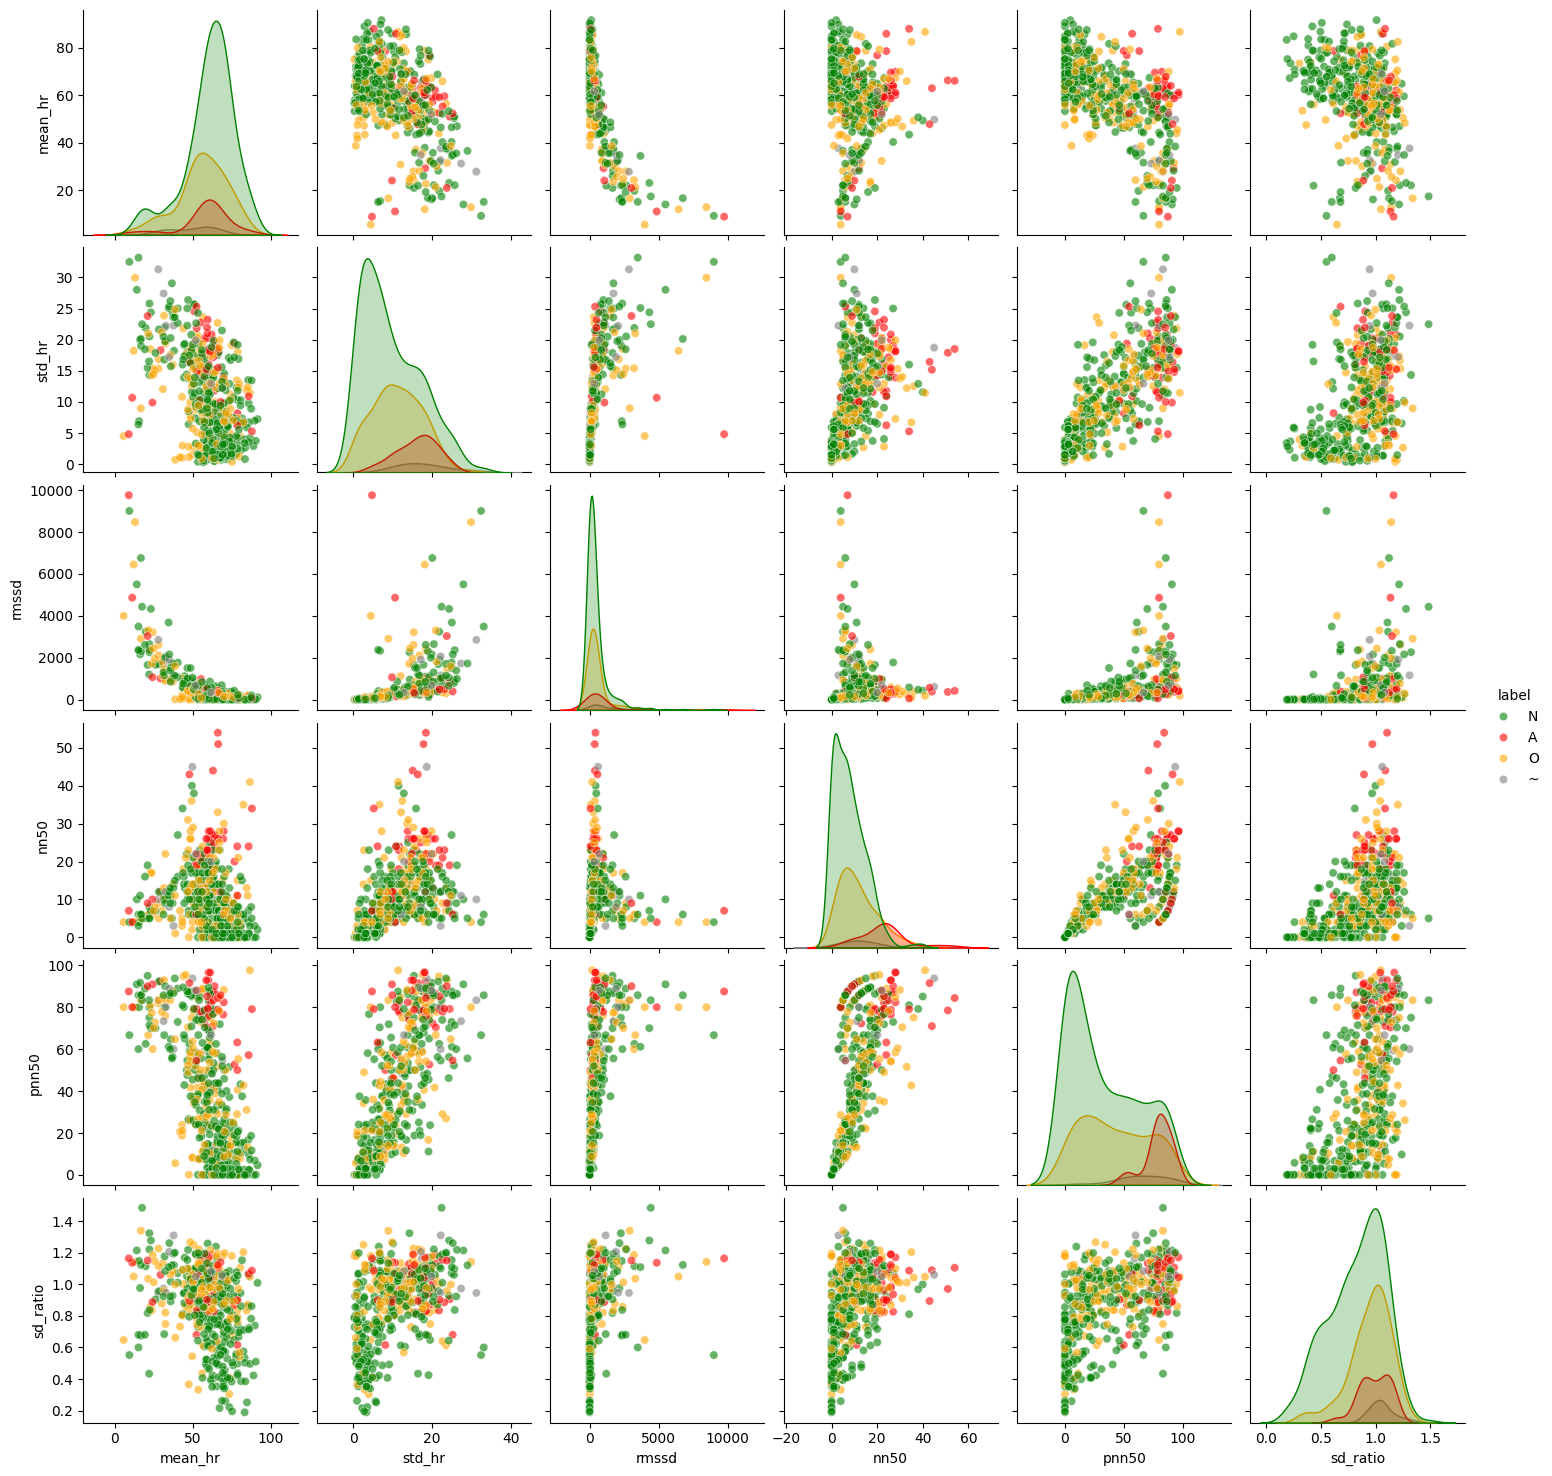

In [7]:
sns.pairplot(hrv_results[:500], hue='label', diag_kind='kde', 
             palette={'N': 'green', 'A': 'red', 'O': 'orange', '~': 'gray'},              
             plot_kws={'alpha': 0.6})
plt.show()

In [14]:
results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Runtime', 'Top Predictor' ])
start_time = time.time()
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_train_score = accuracy_score(y_train, lr.predict(X_train))
lr_test_score = accuracy_score(y_test, lr.predict(X_test))
lr_runtime = time.time() - start_time
top_predictor = X.columns[np.argmax(np.abs(lr.coef_[0]))]
result = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Train Score': [lr_train_score],
    'Test Score': [lr_test_score],
    'Runtime': [lr_runtime],
    'Top Predictor': [top_predictor]
})
print(result)
result = pd.concat([result], ignore_index=True)


                 Model  Train Score  Test Score   Runtime Top Predictor
0  Logistic Regression     0.618182    0.608798  0.076598       hr_mean


/opt/miniconda3/envs/afib/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
start_time = time.time()
# Create a logistic regression model L2
logreg2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
# Fit the model
logreg2.fit(X_train, y_train)
# Predict the target variable
y_pred2 = logreg2.predict(X_test)
# Calculate the accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
# Calculate the runtime
runtime2 = time.time() - start_time
# Get the top predictor
# Append the results
result2 = pd.DataFrame({
    'Model': ['Logistic Regression L2'],
    'Train Accuracy': [logreg2.score(X_train, y_train)],
    'Test Accuracy': [accuracy2],
    'Runtime': [runtime2],
})
print(result2)
results = pd.concat([results, result2], ignore_index=True)

                    Model  Train Accuracy  Test Accuracy   Runtime
0  Logistic Regression L2        0.667595       0.663343  0.108623


/var/folders/3v/t7p60tvs5773q0xm_4_bb2tr0000gn/T/ipykernel_46925/3180948485.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result2], ignore_index=True)


In [17]:
from sklearn.calibration import LinearSVC


start_time = time.time()
# Create a linear SVM model
svm = LinearSVC(random_state=42)
# Fit the model
svm.fit(X_train, y_train)
# Predict the target variable
y_pred_svm = svm.predict(X_test)
# Calculate the accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Calculate the runtime
runtime_svm = time.time() - start_time

# Append the results
result_svm = pd.DataFrame({
    'Model': ['Linear SVM'],
    'Train Accuracy': [svm.score(X_train, y_train)],
    'Test Accuracy': [accuracy_svm],
    'Runtime': [runtime_svm],
})
print(result_svm)
results = pd.concat([results, result_svm], ignore_index=True)

        Model  Train Accuracy  Test Accuracy   Runtime
0  Linear SVM        0.680792         0.6739  0.091968


In [18]:
# Create a random forest model
rf = RandomForestClassifier(random_state=42)
# Fit the model
rf.fit(X_train, y_train)
# Predict the target variable
y_pred_rf = rf.predict(X_test)
# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# Calculate the runtime
runtime_rf = time.time() - start_time
# Get the top predictor
top_predictor_rf = feature_names[np.argmax(rf.feature_importances_)]
# Append the results
result_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train Accuracy': [rf.score(X_train, y_train)],
    'Test Accuracy': [accuracy_rf],
    'Runtime': [runtime_rf],
    'Top Predictor': [top_predictor_rf]
})
print(result_rf)
results = pd.concat([results, result_rf], ignore_index=True)

           Model  Train Accuracy  Test Accuracy   Runtime   Top Predictor
0  Random Forest             1.0       0.723167  8.748672  rr_coefficient


In [19]:
# Create a gradient boosting model
gb = GradientBoostingClassifier(random_state=42)
# Fit the model
gb.fit(X_train, y_train)
# Predict the target variable
y_pred_gb = gb.predict(X_test)
# Calculate the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
# Calculate the runtime
runtime_gb = time.time() - start_time
# Get the top predictor
top_predictor_gb = feature_names[np.argmax(gb.feature_importances_)]
# Append the results
result_gb = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'Train Accuracy': [gb.score(X_train, y_train)],
    'Test Accuracy': [accuracy_gb],
    'Runtime': [runtime_gb],
    'Top Predictor': [top_predictor_gb]
})
print(result_gb)
results = pd.concat([results, result_gb], ignore_index=True)

               Model  Train Accuracy  Test Accuracy    Runtime   Top Predictor
0  Gradient Boosting        0.795161       0.706158  23.788541  rr_coefficient


In [20]:
# Display all the results as a table
display(results)

,Model,Train Accuracy,Test Accuracy,Runtime,Top Predictor
0,Logistic Regression L2,0.667595,0.663343,0.108623,NaN
1,Linear SVM,0.680792,0.673900,0.091968,NaN
2,Random Forest,1.000000,0.723167,8.748672,rr_coefficient
3,Gradient Boosting,0.795161,0.706158,23.788541,rr_coefficient


### Let's do some parameter  hypertuning

In [21]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

ft_results = pd.DataFrame(columns=['Model', 'Hyperparameter', 'Train Accuracy', 'Test Accuracy', 'Runtime'])# # A4-1 Find the best hyperparameters for the 3 models

In [22]:
start_time = time.time()
# Function to optimize Logistic Regression L2
def optimize_logreg_l2(C):
    # Create a logistic regression model L2
    logreg = LogisticRegression(penalty='l2', solver='liblinear', C=C, random_state=42)
    # Fit the model
    logreg.fit(X_train, y_train)
    # Predict the target variable
    y_pred = logreg.predict(X_test)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate the runtime
    runtime = time.time() - start_time
    return accuracy

# Create a BayesianOptimization object

def find_hyperparameter_logreg(X_train, y_train, X_test, y_test): 
    logreg_bo = BayesianOptimization(
        optimize_logreg_l2,
        {'C': (0.001, 10)}
    )

    # Perform the optimization
    logreg_bo.maximize()

    # Get the best hyperparameters
    params = logreg_bo.max['params']
    C = params['C']
    # Create a logistic regression model L2
    logreg = LogisticRegression(penalty='l2', solver='liblinear', C=C, random_state=42)
    # Fit the model
    logreg.fit(X_train, y_train)
    # Predict the target variable
    y_pred = logreg.predict(X_test)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate the runtime
    runtime = time.time() - start_time
    # Append the results
    result = pd.DataFrame({
        'Model': ['Logistic Regression L2'],
        'Hyperparameter': [f'C={C}'],
        'Train Accuracy': [logreg.score(X_train, y_train)],
        'Test Accuracy': [accuracy],
        'Runtime': [runtime]
    })

    return result


result = find_hyperparameter_logreg(X_train, y_train, X_test, y_test)
print(result)
ft_results = pd.concat([result], ignore_index=True)

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.6745    | 3.33      |
| 2         | 0.6768    | 8.603     |
| 3         | 0.6762    | 3.567     |
| 4         | 0.6792    | 9.101     |
| 5         | 0.6762    | 4.586     |
| 6         | 0.6768    | 9.101     |
| 7         | 0.6786    | 9.102     |
| 8         | 0.6698    | 1.818     |
| 9         | 0.6774    | 8.602     |
| 10        | 0.678     | 9.102     |
| 11        | 0.6792    | 9.102     |
| 12        | 0.6768    | 9.103     |
| 13        | 0.6804    | 9.102     |
| 14        | 0.6751    | 4.169     |
| 15        | 0.6792    | 8.602     |
| 16        | 0.6804    | 9.102     |
| 17        | 0.6798    | 8.602     |
| 18        | 0.6786    | 9.103     |
| 19        | 0.6768    | 8.602     |
| 20        | 0.6804    | 9.102     |
| 21        | 0.6792    | 8.602     |
| 22        | 0.6798    | 9.101     |
| 23        | 0.6751    | 9.102     |
| 24        | 0.6798    | 9.243     |
| 25        

In [23]:
start_time=time.time()

# Find the best hyperparameters for random forest
def optimize_random_forest(n_estimators, max_depth):
    model = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth), random_state=42)
    return np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))

def find_hyperparameter_rf(X_train, y_train, X_test, y_test):
    pbounds = {'n_estimators': (10, 100), 'max_depth': (1, 10)}
    optimizer = BayesianOptimization(
        f=optimize_random_forest,
        pbounds=pbounds,
        random_state=1,
    )
    optimizer.maximize()

    best_params = optimizer.max['params']
    best_params['n_estimators'] = int(best_params['n_estimators'])
    best_params['max_depth'] = int(best_params['max_depth'])
    print(best_params)

    result = {
        'algorithm': 'Random Forest',
        'accuracy': optimizer.max['target'],
        'hyperparameters': best_params
    }

    rf = RandomForestClassifier(**best_params, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    train_accuracy = rf.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    runtime = time.time() - start_time
    result = pd.DataFrame({
        'Model': ['Random Forest'],
        'Hyperparameter': [best_params],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Runtime': [runtime]
    })

    # Now we print the top predictors
    top_predictors = [feature_names[i] for i in np.argsort(rf.feature_importances_)[::-1]]
    print("Top predictors:", top_predictors)

    return result

result = find_hyperparameter_rf(X_train, y_train, X_test, y_test)
ft_results = pd.concat([ft_results, result], ignore_index=True)
print(result)


|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
| 1         | 0.7053    | 4.753     | 74.83     |
| 2         | 0.6054    | 1.001     | 37.21     |
| 3         | 0.6494    | 2.321     | 18.31     |
| 4         | 0.65      | 2.676     | 41.1      |
| 5         | 0.7045    | 4.571     | 58.49     |
| 6         | 0.7051    | 4.652     | 70.59     |
| 7         | 0.7293    | 9.967     | 50.92     |
| 8         | 0.7292    | 9.725     | 93.48     |
| 9         | 0.6081    | 1.044     | 99.77     |
| 10        | 0.7295    | 9.948     | 85.88     |
| 11        | 0.6069    | 1.079     | 84.57     |
| 12        | 0.6919    | 3.705     | 51.12     |
| 13        | 0.7274    | 9.985     | 56.92     |
| 14        | 0.7286    | 9.977     | 74.43     |
| 15        | 0.726     | 9.309     | 10.06     |
| 16        | 0.7283    | 9.958     | 64.86     |
| 17        | 0.6087    | 1.398     | 10.03     |
| 18        | 0.7267    | 9.964     | 16.68     |


In [24]:
# Find the best hyperparameters for gradient boosting
start_time = time.time()

def optimize_gradient_boosting(n_estimators, max_depth, learning_rate):
    model = GradientBoostingClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth), learning_rate=learning_rate, random_state=42)
    return np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))


def find_hyperparameter_gb(X_train, y_train, X_test, y_test):
    
    pbounds = {'n_estimators': (10, 100), 'max_depth': (1, 10), 'learning_rate': (0.01, 0.1)}
    optimizer = BayesianOptimization(
        f=optimize_gradient_boosting,
        pbounds=pbounds,
        random_state=1,
    )

    optimizer.maximize()

    best_params = optimizer.max['params']
    best_params['n_estimators'] = int(best_params['n_estimators'])
    best_params['max_depth'] = int(best_params['max_depth'])
    print(best_params)

    result = {
        'algorithm': 'Gradient Boosting',
        'accuracy': optimizer.max['target'],
        'hyperparameters': best_params
    }

    gb = GradientBoostingClassifier(**best_params, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    train_accuracy = gb.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    runtime = time.time() - start_time
    result = pd.DataFrame({
        'Model': ['Gradient Boosting'],
        'Hyperparameter': [best_params],
        'Train Accuracy': [train_accuracy],
        'Test Accuracy': [test_accuracy],
        'Runtime': [runtime]
    })

    # Now we can get the top predictors
    top_predictors = [feature_names[i] for i in np.argsort(gb.feature_importances_)[::-1]]
    print("Top predictors:", top_predictors)

    return result

result = find_hyperparameter_gb(X_train, y_train, X_test, y_test)
print(result)
ft_results = pd.concat([ft_results, result], ignore_index=True)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | 0.6934    | 0.04753   | 7.483     | 10.01     |
| 2         | 0.6585    | 0.03721   | 2.321     | 18.31     |
| 3         | 0.7145    | 0.02676   | 4.11      | 45.71     |
| 4         | 0.7309    | 0.05849   | 4.773     | 71.67     |
| 5         | 0.6557    | 0.0284    | 8.903     | 12.46     |
| 6         | 0.7321    | 0.0871    | 4.767     | 71.51     |
| 7         | 0.732     | 0.05721   | 8.377     | 68.25     |
| 8         | 0.715     | 0.0635    | 2.286     | 65.1      |
| 9         | 0.7283    | 0.04893   | 9.916     | 59.85     |
| 10        | 0.7308    | 0.09567   | 9.982     | 52.73     |
| 11        | 0.6915    | 0.01538   | 3.251     | 54.78     |
| 12        | 0.7245    | 0.05968   | 9.995     | 40.12     |
| 13        | 0.7167    | 0.06316   | 3.223     | 35.95     |
| 14        | 0.7314    | 0.08472   | 9.976     | 46.34     |
| 15    

In [26]:
pd.set_option('display.max_colwidth', None)  
display(ft_results)

,Model,Hyperparameter,Train Accuracy,Test Accuracy,Runtime
0,Logistic Regression L2,C=9.101525486541037,0.682405,0.680352,6.547117
1,Random Forest,"{'max_depth': 9, 'n_estimators': 96}",0.806745,0.712610,56.513856
2,Gradient Boosting,"{'learning_rate': 0.034174109591150234, 'max_depth': 6, 'n_estimators': 83}",0.856012,0.716716,1105.048780
